In [5]:
import pandas as pd  
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import numpy as np


from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [6]:
# Read csv files 

train_df = pd.read_csv('./Input/train.csv')
test_df = pd.read_csv('./Input/test.csv')

In [7]:
# Print the first 5 rows
train_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Splitting the training dataset into pixel data and label Y
Y_train_orig =train_df['label']
X_train_orig = train_df.drop('label',axis=1)

In [10]:
print(X_train_orig.shape)
#print(type(X_train))
print(Y_train_orig.shape)

(42000, 784)
(42000,)


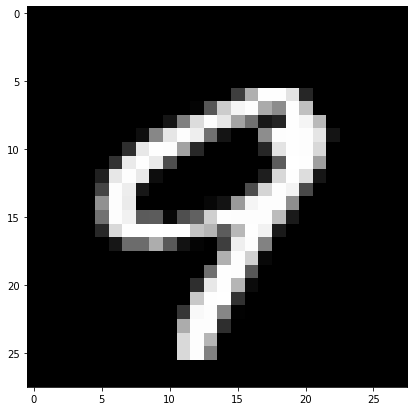

9


In [11]:
#Visualising data 
plt.figure(figsize=(7,7))
idx=100
grid_data = (X_train_orig.iloc[idx]).to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(Y_train_orig[idx])

In [12]:
#Normalize 
# range (-.05,0.5)
X_train_n = (X_train_orig / 255.0)-0.5
X_test_n = (test_df / 255.0)-0.5


In [13]:
#Reshape
X_train_r = X_train_n.values.reshape(-1,28,28,1)
X_test = X_test_n.values.reshape(-1,28,28,1)
print(X_train_r.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [21]:
#converting y labels into one hot vector
Y_train_c = to_categorical(Y_train_orig,num_classes=10)
# print(Y_train_c.shape)

In [23]:
random_seed = 2

In [24]:
#splitting the data set into training and validation set(10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_r, Y_train_c, test_size = 0.1, random_state=random_seed)
print(X_train.shape)
print(X_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [20]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
#Training the model
model.fit(X_train,Y_train,epochs=4,batch_size=32)

Epoch 1/4
1182/1182 [==============================] - 65s 55ms/step - loss: 0.1500 - accuracy: 0.9557
Epoch 2/4
1182/1182 [==============================] - 76s 64ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 3/4
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0309 - accuracy: 0.9906
Epoch 4/4
1182/1182 [==============================] - 121s 102ms/step - loss: 0.0199 - accuracy: 0.9939


In [29]:
# model.save('my_model.h5')
# from keras.models import load_model
#  new_model = load_model('my_model.h5')

In [27]:
# new_model.summary()

In [26]:
# model = new_model
model.evaluate(X_val,Y_val)

132/132 [==============================] - 2s 13ms/step - loss: 0.0500 - accuracy: 0.9857


[0.05003451928496361, 0.9857142567634583]

In [24]:
# predict results
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digitrecgcnn.csv",index=False)
